In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as KTF

config = tf.ConfigProto()
config.gpu_options.allow_growth=True   #不全部占满显存, 按需分配
session = tf.Session(config=config)

# 设置session
KTF.set_session(session)

Using TensorFlow backend.


- 改变优化器的学习率。
- 改变优化器，比如用AdagradOptimizer 或 AdamOptimizer。
- 将batch-size改为1或1000。
- 这些改变如何影响性能？
- 你觉得这些改变对其他分类问题或数学模型有相同的影响吗?
- 如果你不改变任何参数，多次运行Notebook，会得到完成一样的结果吗？为什么？
- 改变plot_example_errors() 函数，使它打印误分类的 logits和y_pred值。
- 用sparse_softmax_cross_entropy_with_logits 代替 softmax_cross_entropy_with_logits。这可能需要改变代码的多个地方。探讨使用这两中方法的优缺点。
- 不看源码，自己重写程序。
- 向朋友解释程序如何工作。

In [2]:
from mnist import MNIST

In [3]:
data = MNIST(data_dir="data/MNIST/")

In [4]:
# 暂存数据的维度信息
img_shape = data.img_shape
img_size = data.img_size
img_size_flat = data.img_size_flat
num_classes = data.num_classes

In [5]:
img_shape, img_size, img_size_flat, num_classes

((28, 28), 28, 784, 10)

In [6]:
# 首先定义需要输入输出的tf变量
x = tf.placeholder(dtype=tf.float32, shape=[None, img_size_flat], name='x')
y_true = tf.placeholder(dtype=tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, axis=1)
weights = tf.Variable(tf.zeros(shape=[img_size_flat, num_classes]))
bias = tf.Variable(tf.zeros(shape=[num_classes]))

In [7]:
# 定义模型
logits = tf.matmul(x, weights) + bias

In [8]:
# 对logits进行softmax激活
y_pred = tf.nn.softmax(logits)
# 找到预测值的真实类别
y_pred_cls = tf.argmax(y_pred, axis=1)

In [9]:
# 注意：
#得到logits后需要 定义对应的损失函数 并计算平均损失，tf提供了一个将logits在激活的同时计算损失值的方法
#对应的logits是根据batch输入计算来的，相应的labels也是输出batch的label
# 问题1：得到logits后忘记计算损失函数的步骤
# 问题2：对损失函数的写法和定义不清楚
# 问题3：对计算的总体损失求平均即每个输入项的损失值，概念不清
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)

In [39]:
# 对计算的平均损失进行梯度下降优化
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(cost)

In [11]:
# 衡量预测类别和真实类别的差距
corr_pred = tf.equal(y_true_cls, y_pred_cls)
accuracy = tf.reduce_mean(tf.cast(corr_pred, dtype=tf.float32))

In [43]:
# 搭建tensorflow会话对计算图进行计算
session = tf.Session()
session.run(tf.global_variables_initializer())

In [44]:
# 用优化器对数据进行优化
def optimize(num_iteration=5):
    for i in range(num_iteration):
        batch_data, batch_true, batch_true_cls = data.random_batch(batch_size=100)
        feed_dict_train = {x:batch_data, y_true:batch_true, y_true_cls:batch_true_cls}
        session.run(optimizer, feed_dict=feed_dict_train)

In [45]:
feed_dict_test = {x:data.x_test, y_true:data.y_test}

In [46]:
def print_accuracy():
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    print("Accuracy:{0}".format(acc))

In [71]:
optimize(num_iteration=1000)

In [72]:
print_accuracy()

Accuracy:0.8700000047683716


In [73]:
w = session.run(weights)

In [74]:
w_min = np.min(w)
w_max = np.max(w)

In [95]:
# 对matplotlib的子图掌握不好
def show_weights():
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    for i, ax in enumerate(axes.flat):
        if i<10:
            image = w[:, i].reshape(img_shape)
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

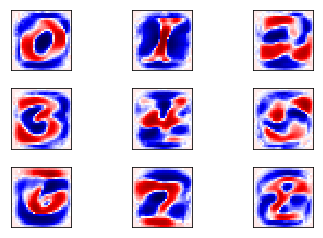

In [96]:
show_weights()